In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Hybrid_Models/experiment_2/

In [1]:
# import modules
import data_generation as dg
import data_encoding as de
import connectionist_component as cc

# load knowledge base and show summary
kb = de.load_data('kb.json')
kb['Summary']

Using TensorFlow backend.


{'Number of samples': 1,
 'Number of literals': 70,
 'Number of premises': 82,
 'Total proofs': 4830,
 'Valid proofs': 531,
 '0': 4299,
 '1': 82,
 '2': 75,
 '3': 63,
 '4': 60,
 '5': 51,
 '6': 54,
 '7': 41,
 '8': 42,
 '9': 35,
 '10': 28}

In [2]:
# load training data and show summary
kbtr = de.load_data('kb_train.json')
kbtr['Summary']

{'Number of samples': 1,
 'Number of literals': 70,
 'Number of premises': 82,
 'Total proofs': 3622,
 'Valid proofs': 398,
 '0': 3224,
 '1': 62,
 '2': 56,
 '3': 47,
 '4': 45,
 '5': 38,
 '6': 40,
 '7': 31,
 '8': 32,
 '9': 26,
 '10': 21}

In [3]:
# FOR TRAINING A MODEL
# encode input data and labels
X, Y = de.as_vectors(kbtr) # for MLP
#X, Y = de.as_vectors(kbtr, sequences=True) # for RNN
print(X.shape)

(3622, 11620)


2022-11-18 10:16:26.668029: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 10:16:26.669790: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 3222 samples, validate on 363 samples
Epoch 1/1
3222/3222 [==============================] - 34s 11ms/step - loss: 0.0411 - accuracy: 0.9904 - val_loss: 0.0302 - val_accuracy: 0.9944


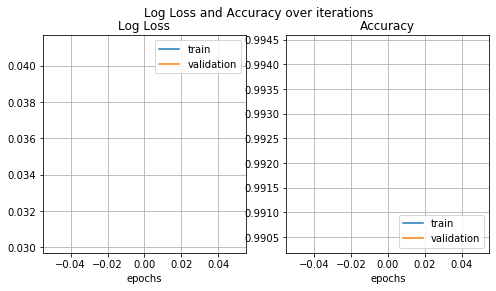

Train/validation data = 3585 
Tests = 37
Overall correct tests = 89.19%
Overall correct valid tests = 0.0%

Used	Train	Test	Correct	Percentage
------------------------------------------
0	3191	33	33	100.0%
1	61	1	0	0.0%
2	55	1	0	0.0%
3	46	1	0	0.0%
4	44	1	0	0.0%
5	38	0	0	0%
6	40	0	0	0%
7	31	0	0	0%
8	32	0	0	0%
9	26	0	0	0%
10	21	0	0	0%


In [4]:
# TRAINING 
#m = cc.fit_model(X, Y, model_type = 'RNN', n_perceptrons=200, n_epochs=250, batch_size=20, split = [0.89, 0.1, 0.01], optimizer='Adamax')
m = cc.fit_model(X, Y, n_perceptrons=2500, h_layers=1, n_epochs=1, batch_size=20, split = [0.89, 0.1, 0.01], activation_function='tanh', optimizer='Adamax')

In [ ]:
# SAVE THE MODEL (optional)

#m.save('my_model')

In [5]:
# TEST CURRENT TRAINED MODEL

# load test data from file
kbte = de.load_data('kb_test.json') # load only test dataset (25%)

# encode test data
X_test, Y_test = de.as_vectors(kbte) # FOR MLP
#X_test, Y_test = de.as_vectors(kbte, sequences=True) # FOR RNN

# predict and show results 
pred = m.predict(X_test)
res = cc.show_results(pred, Y_test)

Total number of tests performed = 1208
Overall correct tests = 88.99%
Overall correct valid tests = 0.0%

Pr_used	Tested	Correct	Percentage
----------------------------------
0	1075	1075	100.0%
1	20	0	0.0%
2	19	0	0.0%
3	16	0	0.0%
4	15	0	0.0%
5	13	0	0.0%
6	14	0	0.0%
7	10	0	0.0%
8	10	0	0.0%
9	9	0	0.0%
10	7	0	0.0%
